In [1]:
# Import and Initialize Sentiment Analyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()


In [2]:
# Importing Dependencies
import pandas as pd
import json
import tweepy
import matplotlib.pyplot as plt
import numpy as np 
from  datetime import datetime
import csv
from config import consumer_key, consumer_secret, access_token, access_token_secret
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [3]:
fb_19 = 'facebook_cashtags_tweets.csv'


In [4]:
fb_19_df = pd.read_csv(fb_19, header=None)


In [5]:

# fb_19_df = fb_19_df.rename({
#     'Text': "b'$FB : 30a4dad3-568a-4b18-b066-813df1f97488'"
# })

In [6]:
fb_19_df

,0,1
0,2018-06-21 00:45:05,b'REAL TIME TRADE ALERTS via PRIVATE $TWTR FEE...
1,2018-06-21 00:43:53,b'RT @charliebilello: Your market recap... \n$...
2,2018-06-21 00:43:42,b'RT @CNBCFastMoney: FANG stocks are out of co...
3,2018-06-21 00:43:17,"b""RT @DataTrekMB: Check out @JeffCoxCNBCcom la..."
4,2018-06-21 00:42:31,b'RT @charliebilello: Your market recap... \n$...
5,2018-06-21 00:42:06,b'MAXIMIZE PROFIT! CHAT WITH TRADERS ON OUR MA...
6,2018-06-21 00:42:04,"b""Instagram's new YouTube killer looks promisi..."
7,2018-06-21 00:41:08,b'RT @CNBCFastMoney: FANG stocks are out of co...
8,2018-06-21 00:40:27,b'RT @TedatACA: European Union panel adopts bi...
9,2018-06-21 00:40:25,b'RT @charliebilello: Your market recap... \n$...


In [15]:
analyzer = SentimentIntensityAnalyzer()
compound_list = []
positive_list = []
negative_list = []
neutral_list = []


for tweet in fb_19_df[1]:
    # Run Vader Analysis on each tweet
    results = analyzer.polarity_scores(tweet)
    compound = results["compound"]
    pos = results["pos"]
    neu = results["neu"]
    neg = results["neg"]
    # Add each value to the appropriate list
    compound_list.append(compound)
    positive_list.append(pos)
    negative_list.append(neg)
    neutral_list.append(neu)
    
len(compound_list), len(positive_list), len(negative_list), len(neutral_list)
fb_19_df.dtypes

0            object
1            object
compound    float64
positive    float64
negative    float64
neutral     float64
dtype: object

In [17]:
fb_19_df['compound'] = compound_list
fb_19_df['positive'] = positive_list
fb_19_df['negative'] = negative_list
fb_19_df['neutral'] = neutral_list

#print(fb_19_df[0])
#for data in fb_19_df[0]:
#    d = datetime.strptime(data, '%Y-%m-%d %H:%M:%S')
#    print("Day" + d.strftime("%d"))
#    print("Hour " + d.strftime("%H"))
#d = datetime.strptime(fb_19_df[0][0], '%Y-%m-%d %H:%M:%S')
#print(d)
#print("Day" + d.strftime("%d"))
#print("Hour " + d.strftime("%H"))

In [20]:
# convert 0 to datetime
fb_19_df[0] = pd.to_datetime(fb_19_df[0])
fb_19_df.dtypes

0           datetime64[ns]
1                   object
compound           float64
positive           float64
negative           float64
neutral            float64
dtype: object

In [23]:
# make col name 0 and 1 --> 'Date' and 'Info'
fb_19_df.rename(columns={0:'Date', 1:'Info'}, inplace=True)
fb_19_df.dtypes

Date        datetime64[ns]
Info                object
compound           float64
positive           float64
negative           float64
neutral            float64
dtype: object

In [55]:
fb_19_df['Day']= fb_19_df['Date'].dt.day
fb_19_df['Hour'] = fb_19_df['Date'].dt.hour
fb2 = fb_19_df.loc[ fb.Hour.isin(range(9,17)) ]  # keep only hours from 9am .. 4pm (hour == 16)
fb2.head()

,Date,Info,compound,positive,negative,neutral,Day,Hour
627,2018-06-20 16:58:25,b'RT @MarketCurrents: Facebook launching test ...,0.0000,0.0,0.000,1.000,20,16
628,2018-06-20 16:56:23,"b'RBC\n\n""Here Comes the $FB Messenger Monetiz...",0.0000,0.0,0.000,1.000,20,16
629,2018-06-20 16:54:46,b'Can the Fang trade get anymore crowded then ...,0.0000,0.0,0.000,1.000,20,16
630,2018-06-20 16:53:04,b'$FB @TruthGundlach short is one of the wor...,-0.6249,0.0,0.291,0.709,20,16
631,2018-06-20 16:53:04,b'$FB is still undervalued in fundanmental or ...,0.0000,0.0,0.000,1.000,20,16


In [61]:
pos_mean = fb2.groupby(['Day','Hour'])['positive'].mean()
neg_mean = fb2.groupby(['Day','Hour'])['negative'].mean()
sent = pos_mean - neg_mean
pos_mean.head(10)

Day  Hour
15   9       0.070667
     10      0.080071
     11      0.068054
     12      0.052108
     13      0.051984
     14      0.065014
     15      0.051516
     16      0.061033
16   9       0.014500
     10      0.016462
Name: positive, dtype: float64

In [70]:
dates = fb2.groupby(['Day','Hour'])['Date'].first()

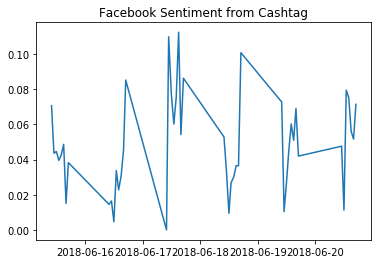

In [73]:
from matplotlib import pyplot as plt
%matplotlib inline
plt.title('Facebook Sentiment from Cashtag')
plt.plot(dates, sent)

In [74]:
fb['Day'].unique()

array([21, 20, 19, 18, 17, 16, 15], dtype=int64)

In [9]:
# converted_timestamps = []
# for raw in fb_19_df[0]:
#     # https://docs.python.org/3/library/datetime.html#strftime-and-strptime-behavior
#     # http://strftime.org/
#     converted_time = datetime.strptime(raw, "%a %b %d %H:%M:%S %z %Y")
#     converted_timestamps.append(converted_time)